In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [110]:
mnist = np.load('mnist.npz') 
            
train_labels = mnist['train_labels']
test_labels = mnist['test_labels']
            
train_data = mnist['train_data'] / 255 # Apply normalization to scale 1-255 to 0-1
print("Training dataset dimensions before reshaping: ", train_data.shape)

train_data = train_data.reshape(train_data.shape[0],-1)
print("Training dataset dimensions after reshaping: ", train_data.shape)

test_data = mnist['test_data'] / 255
test_data = test_data.reshape(test_data.shape[0],-1)

Training dataset dimensions before reshaping:  (60000, 28, 28)
Training dataset dimensions after reshaping:  (60000, 784)


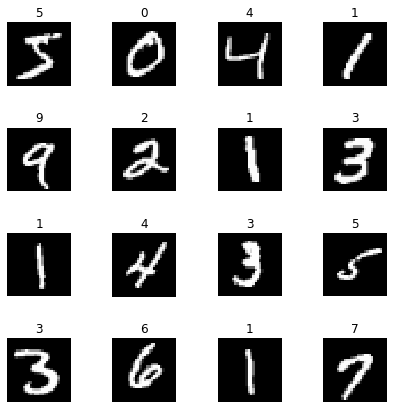

In [111]:
# Creates subplots within a single call
fig, axes = plt.subplots(4, 4, figsize=(6, 6))

# Automatically adjust subplot parameters to give specified padding.
fig.tight_layout()

# Randomly pick 16 indices from the training data
random_idx = np.random.choice(train_data.shape[0], size=16, replace=False)

for i in range(4):
    for j in range(4):
        idx = j + i * 4
        axes[i, j].set_title(train_labels[idx])
        axes[i, j].imshow(train_data[idx].reshape(28, 28), cmap='gray')
        axes[i, j].axis('off')

plt.show()

In [116]:
# # Split into training and validation set
# import random
# from random import randint

# random.seed(65)
# random_number = randint(0, 100)

# X_data, Y_data, X_labels, Y_labels = train_test_split(train_data, train_labels, test_size=0.3, random_state=random_number)

# print("Training size: ", X_data.shape)
# print("Validation size: ", Y_data.shape)

Training size:  (42000, 784)
Validation size:  (18000, 784)


In [121]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# Subset the first 5000 examples from the MNIST dataset
train_data_knn = train_data[:5000]
train_data_knn = train_data_knn.reshape(5000,-1)
train_labels_knn = train_labels[:5000]

# Reshape test data 
test_data_knn = test_data.reshape(10000, -1)
test_labels_knn = test_labels

# train_data_knn = X_data
# # train_data_knn =train_data_knn.reshape(1000,-1)
# train_labels_knn = X_labels
# # test_data_knn = test_data.reshape(10000, -1)
# test_labels_knn = Y_labels

# Training the model
k = 5
scores = {}
for k in range(1,k+1):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_data_knn, train_labels_knn)
    knn_predict = knn.predict(test_data_knn)
    scores[k] = metrics.accuracy_score(test_labels_knn, knn_predict)

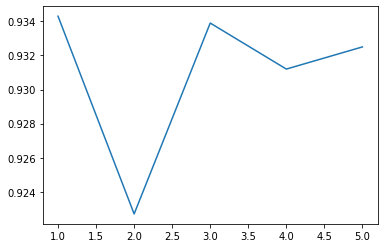

In [122]:
lists = sorted(scores.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.show()

In [123]:
print("Best accuracy achieved with a score of", max(y), "with", x[y.index(max(y))], "neighbor(s)")

Best accuracy achieved with a score of 0.9343 with 1 neighbor(s)


Next steps: Other metrics for evaluating a classification model